# ASSIGNMENT 1
AZAD ALLI, 2021PHS7171;
NAJ KASHYAP, 2021PHS7200

## PROBLEM 7

Write a Julia Snippet which includes a user defined function, call it "initial_data.jl" to define a function on a domain
                                             x ϵ [-10,10]
and generates a plot of the same.

In [2]:
using PyPlot
using SparseArrays: spdiagm

In [3]:

function Wavefunction(x)
    return exp(-x^2)
end


Wavefunction (generic function with 1 method)

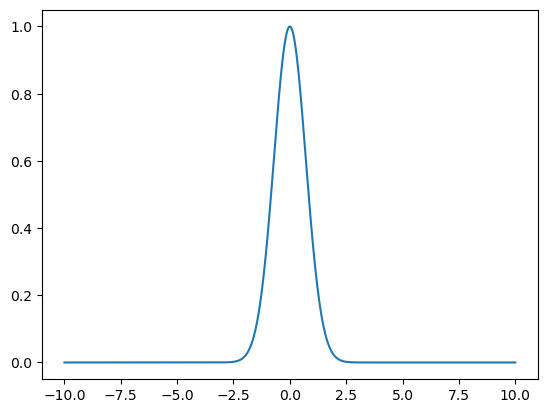

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9614397520>

In [4]:
dx=0.001
L=10
x = collect(-L:dx:L)
n=length(x)
Ψ = Wavefunction.(x)
plot(x,Ψ)

# PROBLEM 8

Write a Julia Snippet which takes the function defined in the "initial_data.jl" and integrates it on the domain x ϵ [-10,10]

In [5]:
# Using Rectangular method
N = sum(Ψ) * dx

1.772453850905516

In [10]:
#using the simpson method
h=length(x)
print(h)
N = 0
for (i,value) in enumerate(x)
    if (value != -10) & (value != 10)
        if i%2==0
            N = N+4*Wavefunction(value)
        else
            N = N + 2*Wavefunction(value)
        end
    end
end
N = N*(dx/3)

20001

1.77245385090551

# PROBLEM 9

Write a Julia Snippet to generate a table giving co-efficients of the second derivative expansion in terms of the discretized function elements.

In [7]:
# Finding coefficients in derivative expansion
function Coef(r)
M = zeros(r,r)
for i =1:r
    for j =1:r
        M[i,j] = 2 * (i)^(2*j) / factorial(2*j)
    end
end  
Mi=M^-1;
colm=Mi*ones(r)*(-2);
ck =Mi[1,:];
return cat(colm[1],ck,dims=1) #k=0 first
end

Coef (generic function with 1 method)

In [8]:
# Defining the r till where the table will be generated
r = 7

# Printing the table
for i=1:r
    println(Coef(i))
end

[-2.0, 1.0]
[-2.5, 1.3333333333333333, -0.08333333333333331]
[-2.7222222222222223, 1.5, -0.15000000000000002, 0.011111111111111127]
[-2.8472222222222223, 1.6, -0.20000000000000018, 0.02539682539682553, -0.001785714285714321]
[-2.9272222222222477, 1.6666666666666876, -0.2380952380952489, 0.039682539682543094, -0.004960317460318053, 0.00031746031746036213]
[-2.982777777777761, 1.714285714285701, -0.267857142857137, 0.052910052910051686, -0.008928571428571397, 0.0010389610389610615, -6.01250601250658e-5]
[-3.0235941043084646, 1.7500000000000775, -0.2916666666667399, 0.06481481481486642, -0.013257575757600004, 0.002121212121219185, -0.00022662522662637852, 1.1892869035801112e-5]
